# Task 1.1: Data Workflow Definition

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [16]:
# Load and prepare data
df = pd.read_csv('../../data/raw/BrentOilPrices.csv')

def parse_date(date_str):
    try:
        if '-' in date_str:
            return pd.to_datetime(date_str, format='%d-%b-%y')
        else:
            return pd.to_datetime(date_str, format='%b %d, %Y')
    except:
        return pd.NaT

df['Date'] = df['Date'].apply(parse_date)
df = df.dropna(subset=['Date']).sort_values('Date').reset_index(drop=True)

print(f"Data period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total observations: {len(df)}")
print(f"Price range: ${df['Price'].min():.2f} to ${df['Price'].max():.2f}")

Data period: 1987-05-20 to 2022-11-14
Total observations: 9011
Price range: $9.10 to $143.95


In [17]:
# Basic statistics
print(df['Price'].describe())
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"Date format changes around: {df[df['Date'] >= '2020-04-01']['Date'].min()}")

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

Missing values: 0
Date format changes around: 2020-04-01 00:00:00


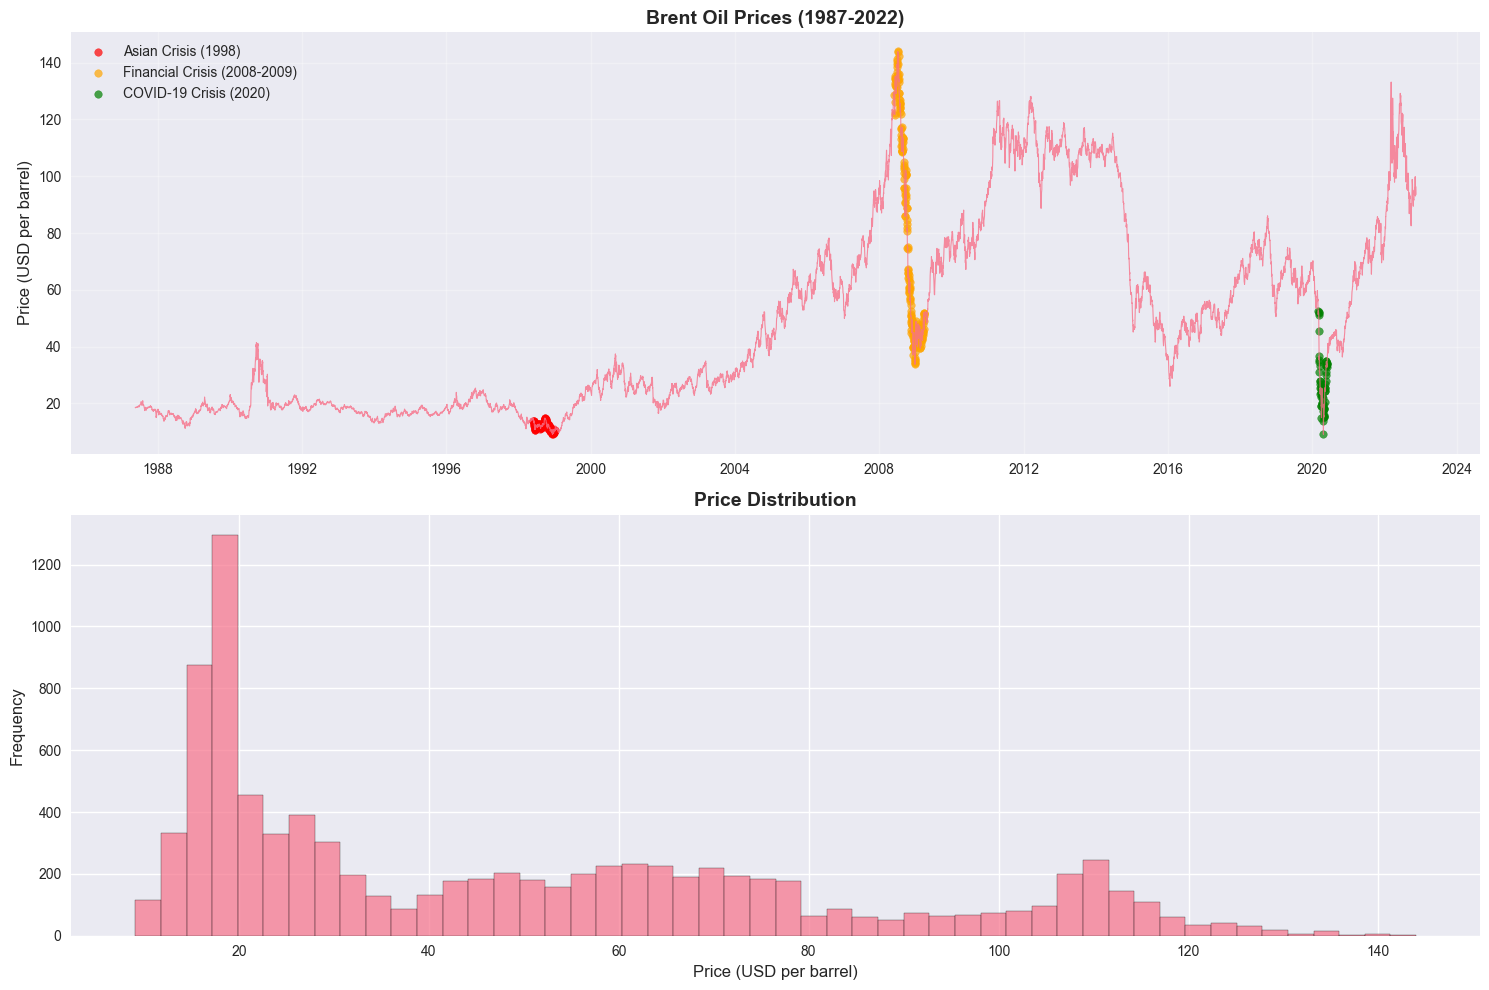

In [18]:
# Time series visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Price'], linewidth=0.8, alpha=0.8)
plt.title('Brent Oil Prices (1987-2022)', fontsize=14, fontweight='bold')
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.grid(True, alpha=0.3)

# Highlight key crisis periods
asian_crisis = df[(df['Date'] >= '1998-06-01') & (df['Date'] <= '1998-12-31')]
financial_crisis = df[(df['Date'] >= '2008-06-01') & (df['Date'] <= '2009-03-31')]
covid_crisis = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-05-31')]

plt.scatter(asian_crisis['Date'], asian_crisis['Price'], 
           color='red', s=30, alpha=0.7, label='Asian Crisis (1998)')
plt.scatter(financial_crisis['Date'], financial_crisis['Price'], 
           color='orange', s=30, alpha=0.7, label='Financial Crisis (2008-2009)')
plt.scatter(covid_crisis['Date'], covid_crisis['Price'], 
           color='green', s=30, alpha=0.7, label='COVID-19 Crisis (2020)')
plt.legend()

# Price distribution
plt.subplot(2, 1, 2)
plt.hist(df['Price'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Price (USD per barrel)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

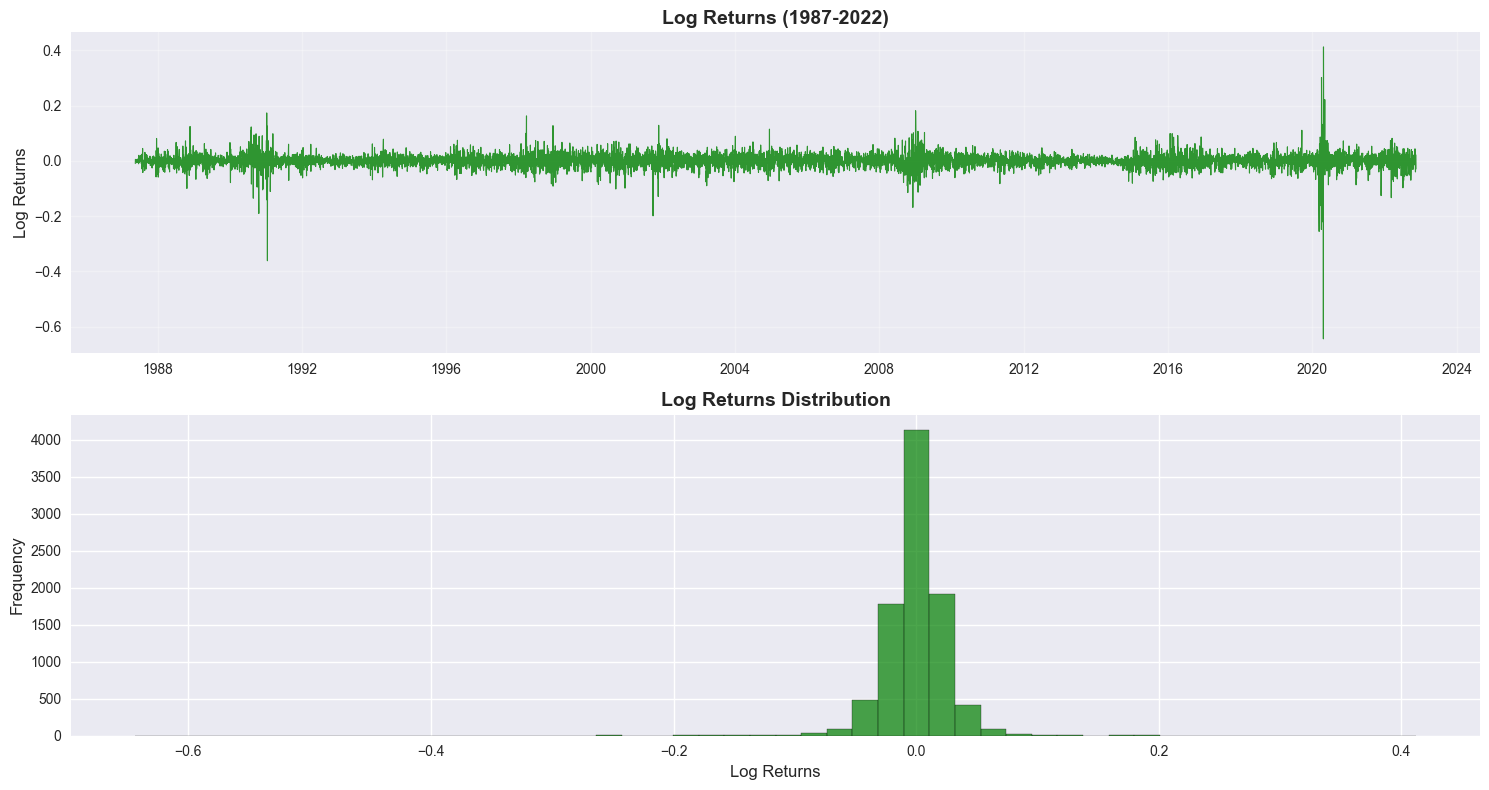

Log returns - Mean: 0.0002, Std: 0.0255


In [19]:
# Log returns analysis
log_returns = np.log(df['Price'] / df['Price'].shift(1)).dropna()

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(df['Date'].iloc[1:], log_returns, linewidth=0.8, alpha=0.8, color='green')
plt.title('Log Returns (1987-2022)', fontsize=14, fontweight='bold')
plt.ylabel('Log Returns', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.hist(log_returns, bins=50, alpha=0.7, edgecolor='black', color='green')
plt.title('Log Returns Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Log Returns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

print(f"Log returns - Mean: {log_returns.mean():.4f}, Std: {log_returns.std():.4f}")

In [20]:
# Key historical events
print("Key Historical Events:")
print(f"- Asian Crisis (1998): Lowest price ${df['Price'].min():.2f}")
print(f"- Financial Crisis (2008): Highest price ${df['Price'].max():.2f}")
print(f"- COVID-19 (2020): Dramatic price collapse")
print(f"- Recent volatility (2022): Ukraine war impact")

Key Historical Events:
- Asian Crisis (1998): Lowest price $9.10
- Financial Crisis (2008): Highest price $143.95
- COVID-19 (2020): Dramatic price collapse
- Recent volatility (2022): Ukraine war impact
